# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.181969538 W= 0.4307689 b= -0.5018962
Epoch: 0100 cost= 0.169838503 W= 0.41999358 b= -0.42437878
Epoch: 0150 cost= 0.159108475 W= 0.40985915 b= -0.35147175
Epoch: 0200 cost= 0.149617702 W= 0.40032732 b= -0.28290075
Epoch: 0250 cost= 0.141223058 W= 0.39136237 b= -0.21840827
Epoch: 0300 cost= 0.133798033 W= 0.38293076 b= -0.15775155
Epoch: 0350 cost= 0.127230659 W= 0.37500057 b= -0.10070219
Epoch: 0400 cost= 0.121421874 W= 0.367542 b= -0.047045853
Epoch: 0450 cost= 0.116284132 W= 0.36052707 b= 0.0034191897
Epoch: 0500 cost= 0.111739941 W= 0.3539293 b= 0.05088287
Epoch: 0550 cost= 0.107720748 W= 0.34772393 b= 0.09552372
Epoch: 0600 cost= 0.104165934 W= 0.34188768 b= 0.13750938
Epoch: 0650 cost= 0.101021893 W= 0.33639854 b= 0.17699796
Epoch: 0700 cost= 0.098241158 W= 0.33123583 b= 0.21413828
Epoch: 0750 cost= 0.095781751 W= 0.32638007 b= 0.24906981
Epoch: 0800 cost= 0.093606651 W= 0.32181326 b= 0.2819235
Epoch: 0850 cost= 0.091682918 W= 0.31751797 b= 0.31282347
Epoch: 09

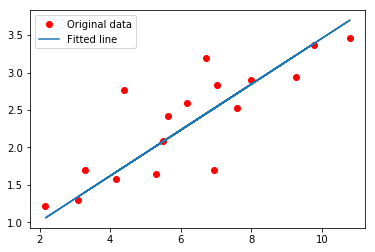

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [10]:
# Regression result